## Analyze Stock (Price) Performance with Linear Regression and Hypothesis Testing Using Python

Hi Pratap Roy! Thanks for working on this project for our team.

The fund management team of our company seeks to improve the performance of its US equity fund by adopting a more quantitative approach (factor investing). As a first step, they want to identify factors that drive stock performance in the fund. They also want to understand how these factors influence fund performance. The fund management team has asked our finance & analytics team to provide such statistical/quantitative analysis.

Your colleagues have already gathered two datasets. The first (stock_prices.csv) contains the daily stock prices for the fund's 15 most important stocks. The second dataset (factors.csv) contains the commonly used Fama/French 5 Factors. As our quantitative analyst, your task is to define and fit one linear regression model per stock that explains stock performance based on the Fama/French 5 Factors. You should then test the importance of independent factors in explaining stock performance. You must conduct hypothesis testing on the regression coefficients (including the intercept) at the 5% significance level. I recommend working with Python (Pandas, Numpy, Matplotlib, Seaborn, and Statsmodels) for this project. Remember, the final models must be free of common time series regression issues such as autocorrelation (serial correlation). Please prepare two results tables for the fund management team with 1) the regression coefficient values for all 15 stocks (5 slope coefficients + intercept per stock) and 2) whether these regression coefficients are significant (true) or not significant (false). The Coefficient of Determination (r-squared) shall be added too. Finally, please sort the five factors from most important to least important when explaining the performance of stocks. 

### Task 1: Load and inspect the Stock Price Dataset 

In this task, you will import the required Python libraries and the stock price dataset (stock_prices.csv) and perform a first data inspection. The DataFrame shall have a DatetimeIndex. Confirm that there are no missing values (NaN) in the dataset.

In [2]:
# Import the Python Libraries pandas (pd), numpy (np), matplotlib.pyplot (plt), seaborn (sns) 
# and statsmodels.formula.api (smf). Limit the number of displayed decimals in floats to 2 (float_format = {:, .2f}).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
pd.options.display.float_format = "{:,.2f}".format

In [3]:
# Read the stock price dataset from the CSV-file stock_prices.csv into a Pandas DataFrame (variable name: prices). 
# Create a DatetimeIndex by passing the "Date" column to the parameters index_col and parse_dates and inspect.
prices = pd.read_csv("stock_prices.csv", index_col = "Date", parse_dates = ["Date"])
prices

,AAPL,AJG,AVB,DLR,ICE,INCY,KHC,LLY,MCHP,MDT,MOH,NDAQ,PRU,STLD,TER
Date,,,,,,,,,,,,,,,
2019-12-31,73.41,95.23,209.70,119.74,92.55,87.32,32.13,131.43,52.36,113.45,135.69,35.70,93.74,34.04,68.19
2020-01-02,75.09,95.51,207.24,118.00,92.67,85.97,31.61,132.21,53.80,114.56,133.37,35.94,94.84,33.80,69.68
2020-01-03,74.36,95.31,209.23,119.94,94.67,77.90,31.24,131.77,52.62,113.88,132.54,36.09,93.26,33.20,68.23
2020-01-06,74.95,95.75,209.58,118.86,94.70,77.34,31.31,132.26,51.87,114.89,137.35,36.07,93.49,33.10,66.75
2020-01-07,74.60,94.72,205.02,117.69,94.43,77.14,30.76,132.51,55.35,114.49,139.26,35.47,93.39,33.83,68.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.86,188.41,163.03,100.87,102.81,81.36,40.52,367.90,69.93,77.50,335.08,61.28,99.56,102.59,86.56
2022-12-27,130.03,189.28,162.80,100.35,102.11,79.59,40.96,364.88,69.03,77.64,334.37,60.98,99.35,102.90,84.76
2022-12-28,126.04,187.95,161.08,99.40,102.27,79.44,40.44,365.22,67.87,76.30,332.42,60.70,98.37,99.89,84.24


### Column Information (stock_prices.csv)

- AAPL: Daily Stock Prices for Apple Inc.
- AJG: Daily Stock Prices for Arthur J. Gallagher & Co.
- AVB: Daily Stock Prices for AvalonBay Communities Inc.
- DLR: Daily Stock Prices for Digital Realty Trust Inc.
- ICE: Daily Stock Prices for Intercontinental Exchange Inc.
- INCY: Daily Stock Prices for Incyte Corporation
- KHC: Daily Stock Prices for The Kraft Heinz Company
- LLY: Daily Stock Prices for Eli Lilly And Co.
- MCHP: Daily Stock Prices for Microchip Technology Inc.
- MDT: Daily Stock Prices for Medtronic PLC
- MOH: Daily Stock Prices for Molina Healthcare Inc.
- NDAQ: Daily Stock Prices for Nasdaq Inc.
- PRU: Daily Stock Prices for Prudential Financial Inc.
- STLD: Daily Stock Prices for Steel Dynamics
- TER: Daily Stock Prices for Teradyne Inc.

In [4]:
# Inspect the DataFrame with the info() method and confirm there are no missing values (NaN) in the dataset.
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2019-12-31 to 2022-12-30
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    757 non-null    float64
 1   AJG     757 non-null    float64
 2   AVB     757 non-null    float64
 3   DLR     757 non-null    float64
 4   ICE     757 non-null    float64
 5   INCY    757 non-null    float64
 6   KHC     757 non-null    float64
 7   LLY     757 non-null    float64
 8   MCHP    757 non-null    float64
 9   MDT     757 non-null    float64
 10  MOH     757 non-null    float64
 11  NDAQ    757 non-null    float64
 12  PRU     757 non-null    float64
 13  STLD    757 non-null    float64
 14  TER     757 non-null    float64
dtypes: float64(15)
memory usage: 94.6 KB


### Column Information (factors.csv)

__The Return of the risk-free Asset:__<br>
__RF:__ the one-month Treasury bill rate (from Ibbotson Associates).

__Fama/French 5 Factors:__

- The "MARKET RISK" factor: <br>
__MktPrem__: Market Risk Premium (Rm-Rf). The excess return of the market portfolio (Rm) over the risk-free asset (Rf). Market Portfolio Return: Value-weight return of all CRSP firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ.

- The "SIZE" factor: <br>
__SMB__: SMB (Small Minus Big Company Size) is the average return on nine small stock portfolios minus the average return on nine big stock portfolios. 

- The "VALUE" factor: <br>
__HML__: HML (High Minus Low [Book Value/Market Value]) is the average return on two value portfolios (high book value/market value) minus the average return on two growth portfolios (low book value/market value).

- The "OPERATING PROFITABILITY" factor: <br>
__RMW__: RMW (Robust Minus Weak) is the average return on two robust operating profitability portfolios minus the average return on two weak operating profitability portfolios.

- The "INVESTMENT" factor: <br>
__CMA__: CMA (Conservative Minus Aggressive) is the average return on two conservative investment portfolios minus the average return on two aggressive investment portfolios.

In [5]:
# Save all Stock Ticker Symbols in a Python list (variable name: symbols).
symbols = prices.columns.to_list()

### Task 2: Visualize Prices and Calculate Daily Price Returns

In this task, you will create a simple price chart and convert daily stock prices (non-stationary time series) into daily stock price returns (covariance stationary time series). Make sure that daily stock returns are in % (for example: 0.5 for 0.5% and not 0.005). Check visually if stock returns are covariance stationary.

Note: For more information on covariance stationarity, please check the asset: covariance_stationarity.pdf.

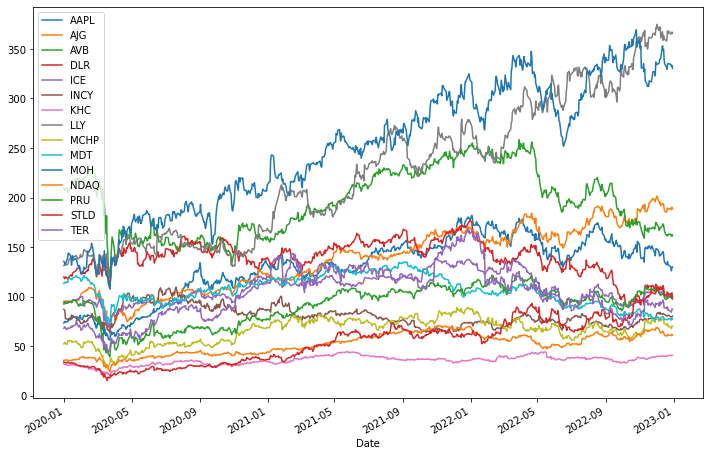

In [6]:
# Visualize daily stock prices over time with a simple price chart (figsize: (12, 8)) using Matplotlib.
prices.plot(figsize=(12,8))
plt.show()

In [7]:
# Calculate daily stock price returns (in %) with .pct_change() and .mul(100) and save the DataFrame in the variable returns. 
# Remove rows with missing Values (NaN).
returns = prices.pct_change().mul(100).dropna()

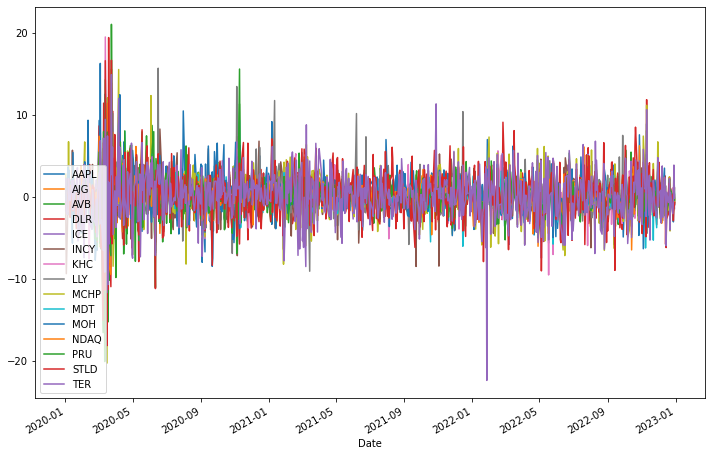

In [8]:
# Plot returns with a simple matplotlib line plot (figsize: (12, 8) and 
# confirm visually that stock price returns are covariance stationary.
returns.plot(figsize = (12,8))
plt.show()

>> (-> Unlike Prices, Financial Returns are covariance stationary.)

### Task 3: Load and Visualize the Fama/French 5 Factors Dataset

In this task, you will load the Fama/French 5 Factors dataset ("factors.csv") and perform a first data inspection and visualization. Confirm that there are no missing values (NaN) in the dataset and check visually if the factors are covariance stationary.

Note: For more information on the Fama/French Factors, please check the asset FamaFrench_factors.pdf.

In [9]:
# Read the Fama/French 5 Factors dataset from the CSV-file factors.csv into a Pandas DataFrame (variable name: factors). 
# Create a DatetimeIndex by passing the "Date" column to the parameters index_col and parse_dates and inspect.
factors = pd.read_csv("factors.csv", index_col= "Date", parse_dates = ["Date"])
factors

,Mkt_Prem,SMB,HML,RMW,CMA,RF
Date,,,,,,
2020-01-02,0.86,-0.97,-0.34,0.24,-0.22,0.01
2020-01-03,-0.67,0.30,0.01,-0.14,-0.10,0.01
2020-01-06,0.36,-0.21,-0.55,-0.17,-0.26,0.01
2020-01-07,-0.19,-0.03,-0.25,-0.13,-0.25,0.01
2020-01-08,0.47,-0.17,-0.64,-0.20,-0.17,0.01
...,...,...,...,...,...,...
2022-12-23,0.51,-0.34,1.15,0.86,0.46,0.02
2022-12-27,-0.51,-0.42,1.43,1.13,1.19,0.02
2022-12-28,-1.23,-0.30,-0.29,-0.96,-0.03,0.02


In [10]:
# Inspect the DataFrame with the info() method and confirm there are no missing values (NaN) in the dataset.
factors.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mkt_Prem  756 non-null    float64
 1   SMB       756 non-null    float64
 2   HML       756 non-null    float64
 3   RMW       756 non-null    float64
 4   CMA       756 non-null    float64
 5   RF        756 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


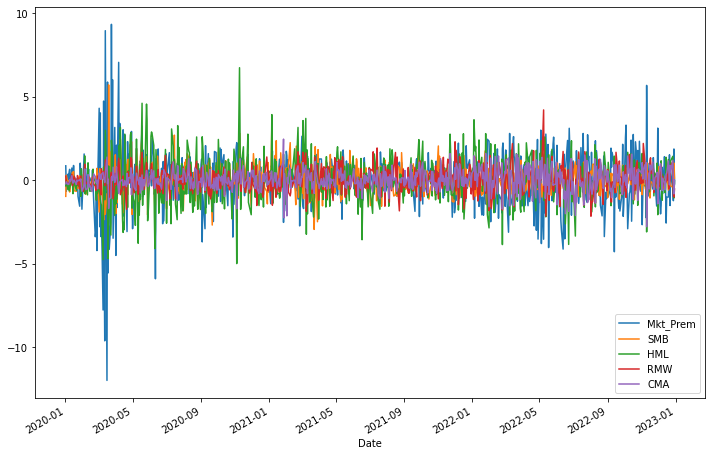

In [12]:
#  Plot all five factors (excl. RF) with a simple matplotlib line plot (figsize: (12, 8)) and 
# confirm visually that factors are covariance stationary.
factors.drop(columns=['RF']).plot(figsize = (12,8))
plt.show()

>> (-> Factors are covariance stationary.)



In [13]:
# Save all Factor Names in a Python list (variable name: fivefactors)
fivefactors = factors.columns[:5].to_list()

### Task 4: Merge Datasets and Prepare the Dependent variables

In this task, you will merge the two DataFrames with stock returns and factors. Then you will calculate and prepare the stock return premiums over the risk-free rate (the dependent variables in the regression). You can then drop the column RF.

Note: For more information on the Fama/French 5 Factor Regression Model, please check the asset FamaFrench_models.

In [15]:
# Concatenate (pd.concat) the two dataframes: returns and factors with an outer join along the columns (1) axis. 
# Save the merged DataFrame in the variable data.
data = pd.concat([returns,factors], join = 'outer', axis = 1)

In [16]:
# Prepare the dependent variables by calculating the stock return premiums over the Risk-Free rate (RF).
data[symbols] = data[symbols].sub(data["RF"], axis = 0)

In [17]:
# Drop the column RF "inplace" as it is no longer needed.
data.drop('RF', axis= 1, inplace=True)

### Task 5: Select the Apple Inc. Stock

In this task, you will prepare the dataset with the Apple Inc. stock only (showcase stock). The Apple Inc. dataset should be a subset of "data" and shall include daily stock return premiums for AAPL and all five factors.

In [18]:
# Create and save a list (filter_list) with all five factor names and "AAPL".
stock = 'AAPL'
cols = fivefactors + [stock]
aapl_df = data[cols]
aapl_df

,Mkt_Prem,SMB,HML,RMW,CMA,AAPL
Date,,,,,,
2020-01-02,0.86,-0.97,-0.34,0.24,-0.22,2.28
2020-01-03,-0.67,0.30,0.01,-0.14,-0.10,-0.98
2020-01-06,0.36,-0.21,-0.55,-0.17,-0.26,0.79
2020-01-07,-0.19,-0.03,-0.25,-0.13,-0.25,-0.48
2020-01-08,0.47,-0.17,-0.64,-0.20,-0.17,1.60
...,...,...,...,...,...,...
2022-12-23,0.51,-0.34,1.15,0.86,0.46,-0.30
2022-12-27,-0.51,-0.42,1.43,1.13,1.19,-1.40
2022-12-28,-1.23,-0.30,-0.29,-0.96,-0.03,-3.08


### Task 6: Perform an EDA - correlation

In this task, you will perform an Explanatory Data Analysis (EDA) and statistical data visualization for AAP. You will calculate and visualize pairwise correlations and identify the factor that shows the strongest correlation with the dependent variable.

In [19]:
# Calculate the pairwise correlation matrix with corr().
corr_matrix = aapl_df.corr()
corr_matrix

,Mkt_Prem,SMB,HML,RMW,CMA,AAPL
Mkt_Prem,1.00,0.20,-0.04,-0.14,-0.30,0.82
SMB,0.20,1.00,0.33,-0.23,0.01,-0.06
HML,-0.04,0.33,1.00,0.46,0.64,-0.26
RMW,-0.14,-0.23,0.46,1.00,0.42,-0.06
CMA,-0.30,0.01,0.64,0.42,1.00,-0.21
AAPL,0.82,-0.06,-0.26,-0.06,-0.21,1.00


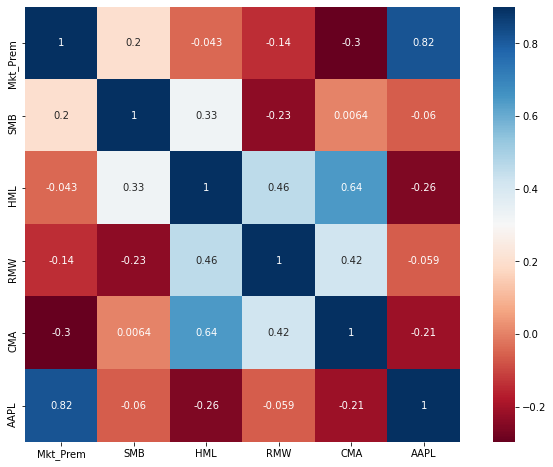

In [20]:
# Visualize the matrix with a seaborn heatmap (figsize (12, 8)) . 
# Correlations shall be annotated (annot = True) to the figure and 
# positive (negative) correlations shall be colored in blue (red) with cmap = "RdBu".
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,vmax = 0.9, annot = True, square = True, cmap = "RdBu")
plt.show()

>> (-> Market Factor (Mkt_Prem) has strongest correlation with Dependent Variable (AAPL).)

### Task 7: Perform an EDA - Pair Plots and Regression Plots

In this task, you will continue the Explanatory Data Analysis (EDA) and statistical data visualization for AAPL.

You will analyze and visualize the statistical relationship between the dependent and the independent factors. Please confirm visually that the relationship between AAPL and the factor Mkt_Prem is strongly linear.

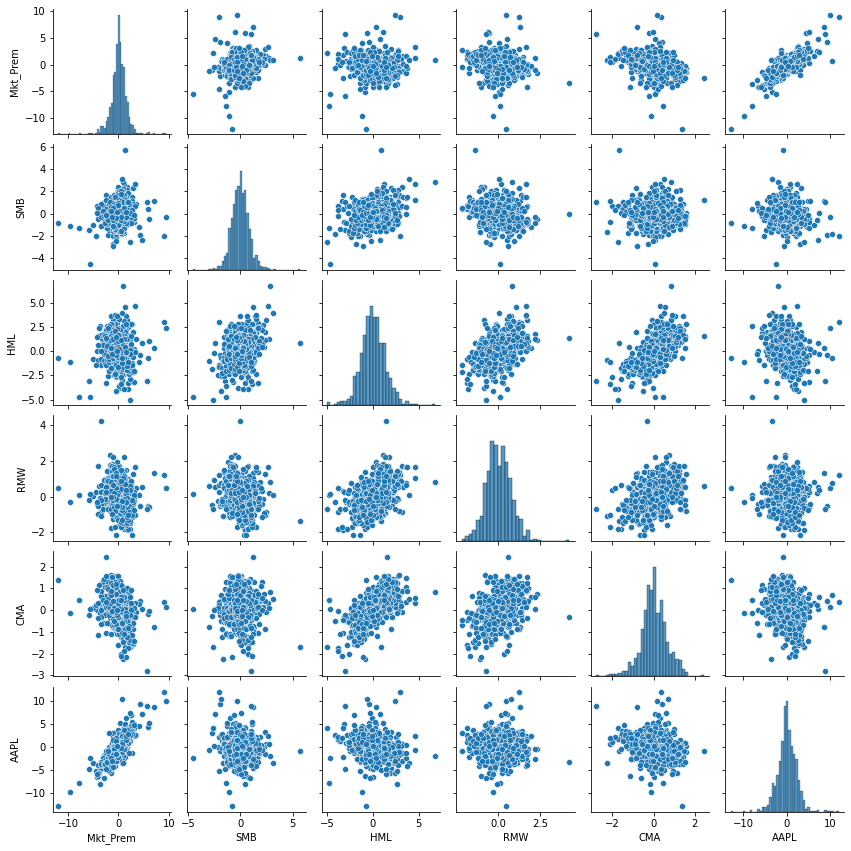

In [22]:
# Create pair-wise scatterplots with a seaborn pairplot (height = 2).
sns.pairplot(aapl_df, height=2)
plt.show()

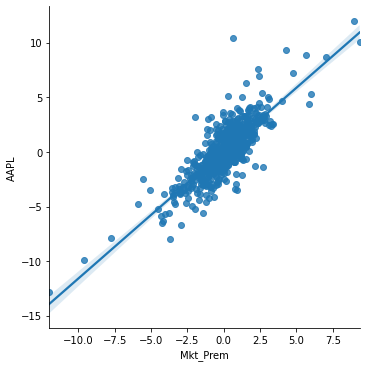

In [23]:
# Confirm with a seaborn lmplot that the relationship between AAPL (y-axis) and Mkt_Prem (x-axis) is strongly linear.
sns.lmplot(x = 'Mkt_Prem', y = 'AAPL', data= aapl_df)
plt.show()

>> (-> Relationship between AAPL and Mkt_Prem is most likely strongly linear).

### Task 8: Define and Fit a Multiple Linear Regression Model

In this task, you will define and fit a multiple linear regression model for the dependent variable "AAPL". Please include all five factors as independent variables.

In [25]:
# Define a multiple linear regression model using smf.ols() and an appropriate string formula. 
# Remember, "AAPL" is the dependent variable. All other factors are independent variables.
model = smf.ols("AAPL ~ Mkt_Prem + SMB + HML + RMW + CMA", data=aapl_df)

In [26]:
# Fit the model and save the fitted model in the variable "results".
results = model.fit()

### Task 9: Analyze the Results of Regression and Hypotheiss Testing

In this task, you will analyze and interpret the results of the OLS regression and hypothesis testing for AAPL. The first goal is to identify all significant independent variables at the 5% Significance Level. Get and inspect the regression coefficients and the coefficient of determination (rsquared).

Note: For more information on OLS regression results, please check the asset regression_summary.png.

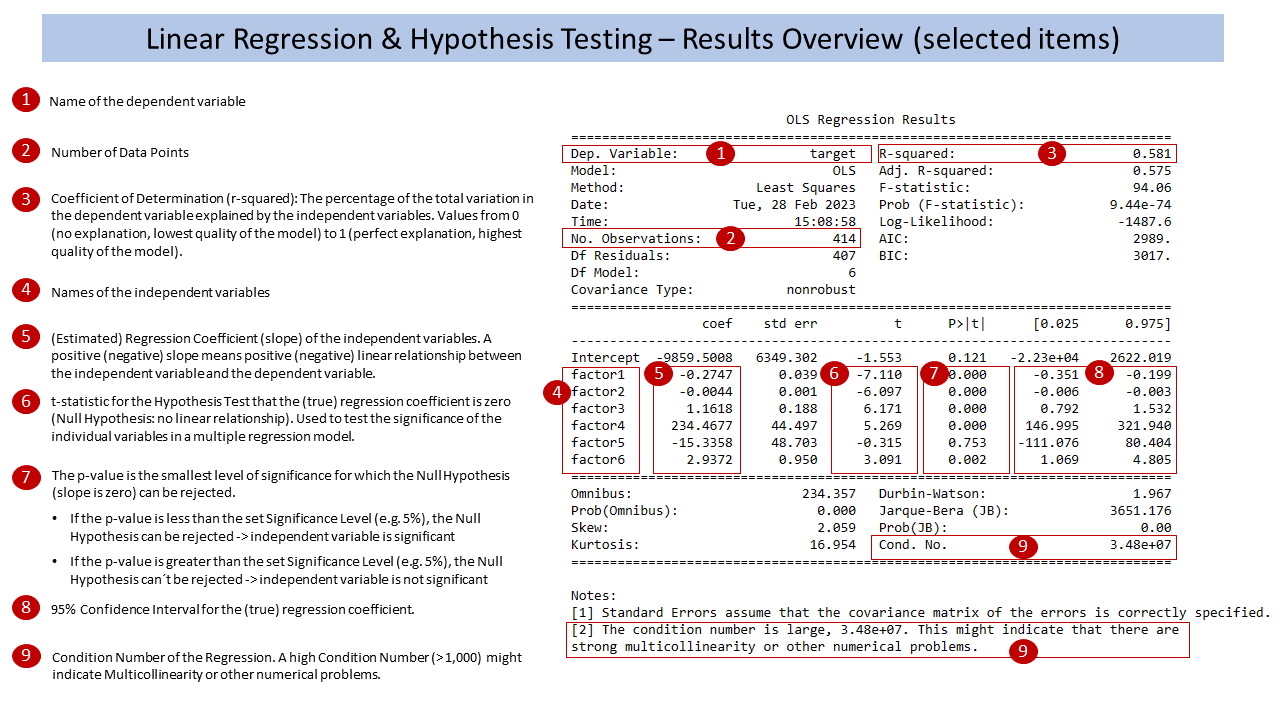

In [27]:
from IPython.display import Image
Image("regression_summary.png")

In [29]:
# Print the results summary table and inspect it.
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     615.7
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.29e-262
Time:                        19:13:30   Log-Likelihood:                -1094.5
No. Observations:                 756   AIC:                             2201.
Df Residuals:                     750   BIC:                             2229.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.038      0.438      0.6

In [30]:
# To determine if an independent variable explains the dependent variable with statistical significance, 
# check if the regression coefficient's p-value is less than the Significance Level (5%).
sig_level = 0.05
results.pvalues < sig_level

Intercept    False
Mkt_Prem      True
SMB           True
HML           True
RMW           True
CMA           True
dtype: bool

In [31]:
# Get the regression coefficients.
results.params

Intercept    0.02
Mkt_Prem     1.31
SMB         -0.19
HML         -0.77
RMW          0.42
CMA          1.10
dtype: float64

In [32]:
# Get the coefficient of determination (rsquared).
results.rsquared

0.8041010875160647

### Task 12: Test the Model for Autocorrelation

In this task, you will test AAPL's model for autocorrelation (serial correlation). Autocorrelation is a common problem in time series regression and can distort regression results.  First, check visually for autocorrelation. Then, perform an appropriate statistical test and decide if Autocorrelation is a problem or not.

Note: For more information on autocorrelation, please check the asset: autocorrelation.pdf.

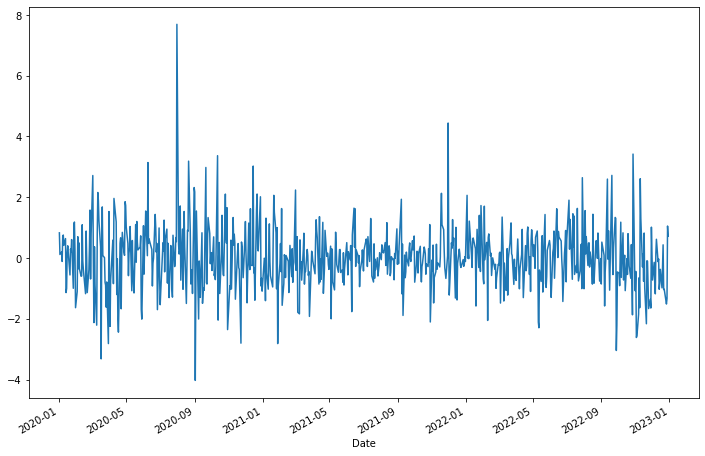

In [33]:
# Visualize regression residuals (resid) with matplotlib and visually confirm that 
# residuals are most likely oscillating around zero (indicates no autocorrelation). 
results.resid.plot(figsize = (12,8))
plt.show()

>> (-> regression residuals are oscillating around zero (most likely))



In [34]:
# Import durbin_watson from statsmodels.stats.stattools and 
# calculate the model's Durbin-Watson Statistic  (DW) using the regression residuals (resid).
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(results.resid)
dw

1.8801440203503694

In [36]:
# Test for autocorrelation with the Durbin-Watson Test (DW). 
# Show that the model's DW Statistic is close to 2 (here: within the interval from 1.6  to 2.4), 
# which indicates the absence of autocorrelation. 
dw > 1.6 and dw < 2.4

True

>> No autocorrelation

### Task 11: Run the Regression for all Stocks and Prepare Results tables

In this task, you will run the regression for all stocks with efficient Python code and prepare detailed results tables for the fund management team in the following form:

In [37]:
# Initialize two empty DataFrames (coeff and signif) with the 
# columns 'Intercept', 'Mkt_Prem', 'SMB', 'HML', 'RMW', 'CMA'.
coeff = pd.DataFrame(columns = ['Intercept', 'Mkt_Prem', 'SMB', 'HML', 'RMW', 'CMA'])
signif = pd.DataFrame(columns = ['Intercept', 'Mkt_Prem', 'SMB', 'HML', 'RMW', 'CMA'])

In [47]:
#  Iterate over the symbols list and perform the following steps for each symbol:

# Create the dataset df with the symbol and all five factors as a subset of data

# Define and fit the regression model with string replacement using .format()

# Save the regression coefficients (params) in coeff

# ave the statistical significance (True or False) of coefficients  and rsquared in signif

for symbol in symbols:
    df = data[fivefactors + [symbol]]
    model = smf.ols(f"{symbol} ~  Mkt_Prem + SMB + HML + RMW + CMA", data = df)
    results = model.fit()
    coeff.loc[symbol] = results.params
    signif.loc[symbol] = results.pvalues < sig_level
    signif.loc[symbol, 'rsquared'] = results.rsquared

In [48]:
coeff

,Intercept,Mkt_Prem,SMB,HML,RMW,CMA
AAPL,0.02,1.31,-0.19,-0.77,0.42,1.10
AJG,0.07,0.88,-0.25,0.24,0.07,-0.15
AVB,-0.06,0.88,-0.02,0.43,0.15,-0.11
DLR,-0.04,0.86,-0.48,-0.17,0.03,0.28
ICE,0.01,0.83,-0.32,0.12,-0.19,-0.10
INCY,-0.01,0.66,-0.12,-0.29,-0.34,0.41
KHC,-0.02,0.79,-0.34,0.19,0.20,0.77
LLY,0.10,0.74,-0.34,-0.28,0.13,0.82
MCHP,0.03,1.47,0.52,-0.28,0.30,-0.11
MDT,-0.07,0.82,-0.05,0.37,-0.00,-0.17


In [49]:
signif

,Intercept,Mkt_Prem,SMB,HML,RMW,CMA,rsquared,rsquared
AAPL,False,True,True,True,True,True,NaN,0.80
AJG,False,True,True,True,False,False,NaN,0.58
AVB,False,True,False,True,False,False,NaN,0.49
DLR,False,True,True,True,False,True,NaN,0.40
ICE,False,True,True,True,True,False,NaN,0.55
INCY,False,True,False,True,True,True,NaN,0.28
KHC,False,True,True,True,True,True,NaN,0.42
LLY,False,True,True,True,False,True,NaN,0.28
MCHP,False,True,True,True,True,False,NaN,0.67
MDT,False,True,False,True,False,False,NaN,0.54


### Task 12: summarize the Quality of Fama/French Factor Models in Explaining Stock Performance

In this task, you will summarize and compare the importance (significance) of the five factors in explaining stock performance across multiple Stocks. Which factor is the most important one? For how many stocks does each factor significantly explain the performance? Second, you will calculate the average quality (average r-squared) of the Fama/French 5 Factor Model in explaining stock performance across multiple stocks.   

In [50]:
# Calculate for how many stocks each factor is significant (relative frequency in %) 
# by taking the mean of signif. Sort from high to low importance (descending).
signif[fivefactors].mean().sort_values(ascending = False).mul(100)

Mkt_Prem   100.00
HML         86.67
SMB         66.67
CMA         46.67
RMW         40.00
dtype: float64

> Interpretation: The Market Premium is always significant. The marginal benefits of adding more (less significant) Factors (HML & SMB in the 3-Factor-Model and CMA & RMW in the 5-Factor-Model) are declining.

In [51]:
# Calculate the (simple) mean rsquared across all stocks.
signif.rsquared.mean()

0.5282455279880509

> Interpretation: On average, the Fama/French 5 Factor Model explains more than 50% of the Stock Performance.